In [1]:
# Load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

# Task 1: 
Create a Jupyter Notebook to present your analysis and perform an exploratory data analysis (EDA) on flights.csv file.

In [2]:
# Read file
all_flight_details = pd.read_csv('flights.csv')

# Get counts of rows and columns
print(all_flight_details.shape)

(336776, 19)


In [3]:
# Get information about the contents of columns
print(all_flight_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [4]:
# Convert column 18 "time_hour" to datetime
all_flight_details['time_hour'] = pd.to_datetime(all_flight_details['time_hour'])
print(all_flight_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   year            336776 non-null  int64              
 1   month           336776 non-null  int64              
 2   day             336776 non-null  int64              
 3   dep_time        328521 non-null  float64            
 4   sched_dep_time  336776 non-null  int64              
 5   dep_delay       328521 non-null  float64            
 6   arr_time        328063 non-null  float64            
 7   sched_arr_time  336776 non-null  int64              
 8   arr_delay       327346 non-null  float64            
 9   carrier         336776 non-null  object             
 10  flight          336776 non-null  int64              
 11  tailnum         334264 non-null  object             
 12  origin          336776 non-null  object             
 13  dest          

In [5]:
# Check contents of first few records of dataframe
all_flight_details.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00+00:00


In [6]:
# Get more details about contents of numeric columns
all_flight_details.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [7]:
all_flight_details['carrier'].value_counts()

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

## Exploratory Data Analysis (EDA) Results:

Dataset contains data from January to December of the year 2013 for 16 airline carriers. Both of the concerned airlines (DL and UA) have over 40,000 records. The columns dep_time, dep_delay, arr_time, arr_delay, tail_num, and air_time has empty values as they do not have their total "non-null count" does not match the actual CSV record count of 336,776 records).



---



# Task 2:
Create at least 5 different views (reports) to the team using the imported dataset. The reports should be composed of a description, charts and tables based on some selected columns. These reports can give some insights to the team about the airport operation and potential optimizations.

## Arrival Delay of All Flights
Description:
The report below shows a histogram of the arrival delays of all flights. Most flights are able to arrive on time or even in advance, as can be seen since most of the area falls to the left of the value of 0 on the x-axis. Early arrivals are at most about one hour early but late arrivals can reach up to two hours or more. Work can be done to improve on making the maximum arrival delay shorter to less than an hour.

In [8]:
# Preview data
all_flight_details['arr_delay'].value_counts()

-13.0     7177
-10.0     7088
-12.0     7046
-14.0     6975
-11.0     6863
          ... 
 850.0       1
 375.0       1
 506.0       1
 595.0       1
 379.0       1
Name: arr_delay, Length: 577, dtype: int64

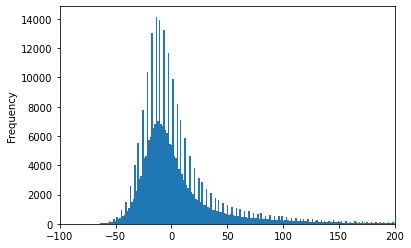

In [9]:
# Plot the report
all_flight_details['arr_delay'].plot(kind='hist', bins=1000, xlim=(-100,200))

## Flights per Carrier
Description: The report below shows that the top 5 carriers with the most number of flights have close to 75% of the total flights of the airport. Therefore, losing any of these top 5 carriers as a customer will severely impact the profitability of the airport.

In [10]:
# Show the report data
all_flight_details['carrier'].value_counts()

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

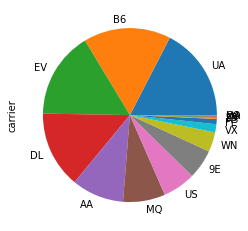

In [11]:
# Plot the report
all_flight_details['carrier'].value_counts().plot(kind='pie')

## Flights per Month
Description: The report below shows the number of flights per month. Based on the data, the busiest months are in July and August while the slowest months are January and February. This data can be used for resource planning such as manpower and pre-ordering of consumables like jetfuel.

In [12]:
# Prepare the data for the report
flights_per_month_temp = all_flight_details[['time_hour']]
flights_per_month_temp.insert(1,'count', 1)
flights_per_month = flights_per_month_temp.groupby(pd.Grouper(key='time_hour', axis=0, freq='M')).count()

# Show the data
flights_per_month

,count
time_hour,
2013-01-31 00:00:00+00:00,27004
2013-02-28 00:00:00+00:00,24951
2013-03-31 00:00:00+00:00,28834
2013-04-30 00:00:00+00:00,28330
2013-05-31 00:00:00+00:00,28796
2013-06-30 00:00:00+00:00,28243
2013-07-31 00:00:00+00:00,29425
2013-08-31 00:00:00+00:00,29327
2013-09-30 00:00:00+00:00,27574


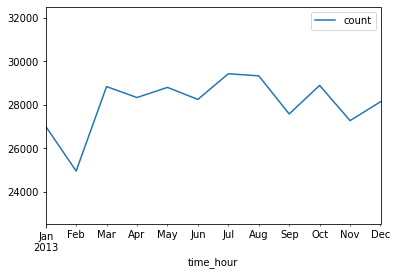

In [13]:
# Plot the report
flights_per_month.plot(kind='line', ylim=(22500,32500))

## Departure Delay Statistics per Carrier
Description: The report below shows that among the carriers, carrier "US" is the most consistent to depart near the scheduled departure time as indicated by a small mean value and a lowest standard deviation from the mean. It also shows that carrier "F9" is the most likely to be delay and the amount of delay varies by a wide margin. Another interesting point is that carrier "HA", while it has an average delay of only about 5 mins, has the largest standard deviation meaning it is the least consistent. That is, it can be very early or very late.

In [14]:
# Prepare the data for the report
departure_delay_stats = all_flight_details[['carrier', 'dep_delay']].groupby(pd.Grouper(key='carrier')).agg([np.nanmean, np.nanstd])
departure_delay_stats_per_carrier = pd.DataFrame({'carrier': departure_delay_stats.index.values, 'mean': departure_delay_stats['dep_delay']['nanmean'].values, 'stddev': departure_delay_stats['dep_delay']['nanstd'].values})

# Show the data
departure_delay_stats_per_carrier

,carrier,mean,stddev
0,UA,12.106073,35.716597
1,AA,8.586016,37.354861
2,B6,13.022522,38.503368
3,DL,9.264505,39.735052
4,EV,19.955390,46.552354
5,MQ,10.552041,39.184566
6,US,3.782418,28.056334
7,WN,17.711744,43.344355
8,VX,12.869421,44.815099
9,FL,18.726075,52.661600


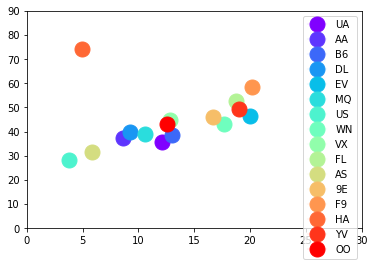

In [15]:
# Setup/configure the plot
fig, ax = plt.subplots()

# Prepare colors for use in the chart
nrof_labels = departure_delay_stats_per_carrier.shape[0]
colors = cm.rainbow(np.linspace(0, 1, nrof_labels))

for i, r in departure_delay_stats_per_carrier.iterrows():
    ax.plot(r['mean'], r['stddev'], marker='o', markersize=15, color=colors[i], linewidth=0.1, label=r['carrier'])

ax.set_xlim(0, 30)
ax.set_ylim(0, 90)
plt.legend(loc='best')

# Show the report
plt.show()

## Flights per Day of Week
Description: The report below shows the number of flights per day of the week. Based on the data, the number of flights from Monday to Friday are pretty much the same. However, there are fewer flights on weekends specially on Saturdays. This information can also be used for resource planning or for finding schedules for new flights.

In [16]:
# Prepare the data for the report
all_flight_details_datenday = all_flight_details[['time_hour']]
all_flight_details_datenday.insert(1, 'dayofweek', all_flight_details_datenday['time_hour'].dt.dayofweek)
count_per_day_of_week = all_flight_details_datenday['dayofweek'].value_counts().sort_index()

# Fix the column names
days_of_week = ['MO', 'TU', 'WE', 'TH', 'FR', 'SA', 'SU']
flights_per_dayofweek = pd.DataFrame({'day': days_of_week, 'count': count_per_day_of_week})

# Show the data
flights_per_dayofweek

,day,count
0,MO,50690
1,TU,50422
2,WE,50060
3,TH,50219
4,FR,50308
5,SA,38720
6,SU,46357


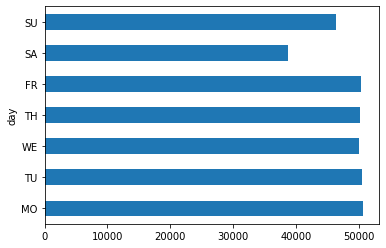

In [17]:
# Show the report
flights_per_dayofweek.plot(kind='barh', x='day', legend=False)



---



# Task 3:
Create a new dataset named (pop_data) with flight data from airlines UA (United Airlines) and DL (Delta Airlines). The data set must contain only two columns, company name and delayed arrival flights. The data must be extracted from dataset flights.csv to build the pop_data dataset. The dataset should be limited to no more than 20,000 rows per airlines.

In [18]:
# Get the indices of records containing only DL flights
dl_indices = all_flight_details.index[all_flight_details['carrier'] == 'DL']
dl_indices

Int64Index([     4,     20,     23,     29,     53,     54,     55,     56,
                61,     62,
            ...
            336651, 336656, 336662, 336666, 336667, 336670, 336674, 336715,
            336718, 336744],
           dtype='int64', length=48110)

In [19]:
# Get the indices of records containing only DL flights
ua_indices = all_flight_details.index[all_flight_details['carrier'] == 'UA']
ua_indices

Int64Index([     0,      1,      5,     12,     13,     16,     24,     26,
                32,     37,
            ...
            336697, 336699, 336702, 336706, 336714, 336723, 336728, 336737,
            336755, 336762],
           dtype='int64', length=58665)

In [20]:
# Merge the two indices while only getting the first 20000 from each set
tgt_indices = dl_indices[:20000].union(ua_indices[:20000])
tgt_indices

Int64Index([     0,      1,      4,      5,     12,     13,     16,     20,
                23,     24,
            ...
            141983, 141985, 141995, 141996, 142013, 142034, 142042, 142046,
            142053, 142058],
           dtype='int64', length=40000)

In [21]:
# Get the records corresponding to the target indices
tgt_records = all_flight_details.loc[tgt_indices]
tgt_records

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00+00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00+00:00
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01 06:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142034,2013,3,7,954.0,900,54.0,1156.0,1116,40.0,DL,181,N3764D,LGA,DTW,80.0,502,9,0,2013-03-07 09:00:00+00:00
142042,2013,3,7,959.0,1000,-1.0,1334.0,1334,0.0,DL,1765,N704X,JFK,SFO,357.0,2586,10,0,2013-03-07 10:00:00+00:00
142046,2013,3,7,1005.0,1004,1.0,1210.0,1220,-10.0,DL,2319,N349NW,LGA,MSP,153.0,1020,10,4,2013-03-07 10:00:00+00:00
142053,2013,3,7,1025.0,1029,-4.0,1250.0,1308,-18.0,DL,1529,N3732J,JFK,LAS,304.0,2248,10,29,2013-03-07 10:00:00+00:00


In [22]:
# Extract the required columns: the carrier and the arrival delay
# Create the required population data
pop_data = tgt_records[['carrier', 'arr_delay']]
pop_data

,carrier,arr_delay
0,UA,11.0
1,UA,20.0
4,DL,-25.0
5,UA,12.0
12,UA,7.0
...,...,...
142034,DL,40.0
142042,DL,0.0
142046,DL,-10.0
142053,DL,-18.0


In [23]:
# Show that population contains 20,000 records of each carrier
pop_data['carrier'].value_counts()

DL    20000
UA    20000
Name: carrier, dtype: int64



---



# Task 4:
Create two new datasets (“dl” and “ua”) of 1000 observations each from the “pop_data” dataset only with data from the DL (Delta Airlines) for “dl” and only data from UA (United Airlines) for “ua” . Tip: Include a column called sample_id populated with number 1 for the first sample and 2 for the second sample

Note: Filter out records which have empty values for arrival delay. This normalizes the sample to be used for processing.

In [24]:
# Create the DL dataset of a sample of 1000 records of Delta Airline flights
dl = pop_data[(pop_data['carrier'] == 'DL') & ~pop_data['arr_delay'].isnull()].sample(1000)
dl['sample_id'] = 1
dl.describe()

,arr_delay,sample_id
count,1000.000000,1000.0
mean,-3.717000,1.0
std,30.079623,0.0
min,-65.000000,1.0
25%,-20.000000,1.0
50%,-9.500000,1.0
75%,4.000000,1.0
max,350.000000,1.0


In [25]:
# Create the UA dataset of a sample of 1000 records of United Airlines flights
ua = pop_data[(pop_data['carrier'] == 'UA') & ~pop_data['arr_delay'].isnull()].sample(1000)
ua['sample_id'] = 2
ua.describe()

,arr_delay,sample_id
count,1000.000000,1000.0
mean,3.036000,2.0
std,35.215236,0.0
min,-67.000000,2.0
25%,-15.000000,2.0
50%,-5.000000,2.0
75%,10.000000,2.0
max,330.000000,2.0




---



# Task 5:
Create a new dataset (samples) containing the data of the 2 samples created in the previous item to be used in future analysis.

In [26]:
# Merge the two datasets into a single dataset "samples"
samples = pd.concat([dl, ua])
samples

,carrier,arr_delay,sample_id
94229,DL,-22.0,1
87246,DL,-19.0,1
115185,DL,12.0,1
2679,DL,28.0,1
88466,DL,5.0,1
...,...,...,...
110033,UA,16.0,2
35961,UA,35.0,2
46926,UA,-17.0,2
46624,UA,1.0,2




---



# Task 6:
For each sample (“dl” and “ua”) calculate de standard error and the mean.

In [27]:
# Calculate the standard error for DL flights
dl_stderr = (dl['arr_delay'].std()) / (len(dl)**0.5)
dl_stderr

0.9512011851836051

In [28]:
# Calculate the mean for DL flights
dl_mean = dl['arr_delay'].mean()
dl_mean

-3.717

In [29]:
# Calculate the standard error for UA flights
ua_stderr = (ua['arr_delay'].std()) / (len(ua)**0.5)
ua_stderr

1.1136035276600076

In [30]:
# Calculate the mean for UA flights
ua_mean = ua['arr_delay'].mean()
ua_mean

3.036



---



# Task 7:
For each mean calculated before we need to define the “confidence intervals” in this case 95% confidence interval. It means calculate lower and upper values.

Note: since confidence interval required is 95%, the corresponding value for z-interval is 1.96

In [31]:
# Calculate the lower and upper values for DL
dl_lower = dl_mean - 1.96 * dl_stderr
dl_upper = dl_mean + 1.96 * dl_stderr
(dl_lower, dl_upper)

(-5.581354322959866, -1.852645677040134)

In [32]:
# Calculate the lower and upper values for UA
ua_lower = ua_mean - 1.96 * ua_stderr
ua_upper = ua_mean + 1.96 * ua_stderr
(ua_lower, ua_upper)

(0.8533370857863853, 5.218662914213615)



---



# Task 8:
After these set of previous calculations it was requested that you take the T-TEST concept and apply it on your 2 groups of data (“means”) to let your team knows if Delta Airlines (DL) flights are delayed more than United Airlines (UA) flights ?

In [33]:
# Use the TTest function from scipy
from scipy import stats
stats.ttest_ind(dl['arr_delay'], ua['arr_delay'], equal_var=False)

Ttest_indResult(statistic=-4.61098360769766, pvalue=4.267667497500396e-06)



---



# Analysis of Results
It is found that United Airlines are more delayed than Delta Airlines based on the lower and upper values obtained from Task 7. Furthermore the results of the T-Test shows that the P-value is very small. This means that we can accept that the results are valid.